 - http://fredrikj.net/blog/2009/08/3d-visualization-of-complex-functions-with-matplotlib/

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import pylab
import numpy as np
import mpmath
%matplotlib inline

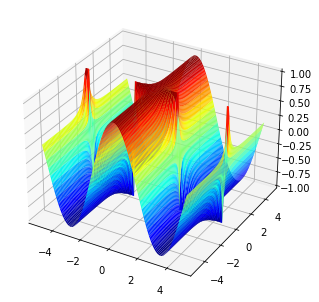

In [2]:
mpmath.dps = 5
# Use instead of arg for a continuous phase
def arg2(x):
    return mpmath.cos(mpmath.arg(x))

#f = lambda z: abs(mpmath.loggamma(z))
#f = lambda z: arg2(mpmath.exp(z))
#f = lambda z: abs(mpmath.besselj(3,z))
f = lambda z: arg2(mpmath.cos(z))

fig = pylab.figure()
ax = Axes3D(fig)

X = np.arange(-5, 5, 0.125)
Y = np.arange(-5, 5, 0.125)
X, Y = np.meshgrid(X, Y)
xn, yn = X.shape
W = X*0
for xk in range(xn):
    for yk in range(yn):
        try:
            z = complex(X[xk,yk],Y[xk,yk])
            w = float(f(z))
            if w != w:
                raise ValueError
            W[xk,yk] = w
        except (ValueError, TypeError, ZeroDivisionError):
            # can handle special values here
            pass
    #print(xk, xn)

# can comment out one of these
ax.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=cm.jet)

#ax.plot_wireframe(X, Y, W, rstride=5, cstride=5)

In [3]:
from scipy import special

In [4]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)
z = x.ravel()+ y.ravel()*1j

In [5]:
f = np.log(z)#(z**7-1)/z**2

In [6]:
f = f.reshape(x.shape)

Text(0.5, 0, '$|z|= |\\log(z)|$')

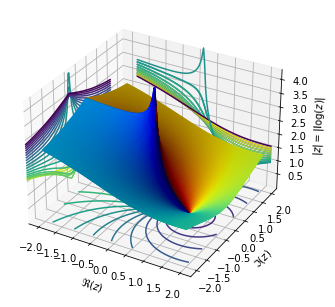

In [7]:
fig = plt.figure()
axe = Axes3D(fig)
norm = colors.Normalize(vmin=-np.pi, vmax=np.pi)
axe.plot_surface(x, y, np.abs(f), facecolors=cm.jet(norm(np.angle(f))), rstride=1, cstride=1)
axe.contour(x, y, np.abs(f), 20, zdir='z', offset=0)
axe.contour(x, y, np.abs(f), 20, zdir='x', offset=-2.5)
axe.contour(x, y, np.abs(f), 20, zdir='y', offset=2.5)
axe.set_xlabel("$\Re({z})$")
axe.set_ylabel("$\Im({z})$")
axe.set_zlabel("$|z|= |\log(z)|$")

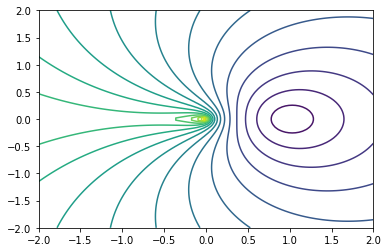

In [8]:
fig, axe = plt.subplots()
axe.contour(x, y, np.abs(f), 20)

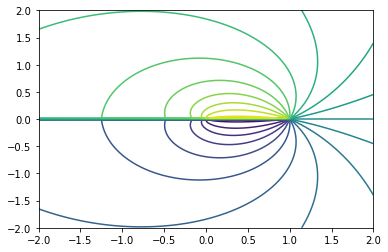

In [9]:
fig, axe = plt.subplots()
axe.contour(x, y, np.angle(f), 20)

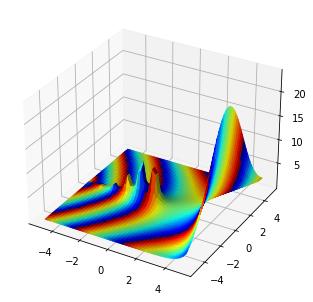

In [10]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x, y = np.meshgrid(x, y)
z = x.ravel()+ y.ravel()*1j
f = special.gamma(z)
f = f.reshape(x.shape)
fig = plt.figure()
axe = Axes3D(fig)
norm = colors.Normalize(vmin=-np.pi, vmax=np.pi)
axe.plot_surface(x, y, np.abs(f), facecolors=cm.jet(norm(np.angle(f))), rstride=1, cstride=1)

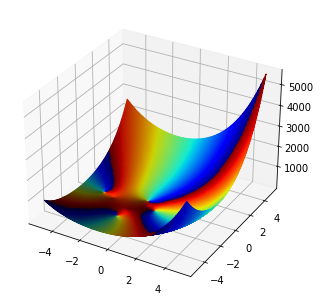

In [11]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = x.ravel()+ y.ravel()*1j
f = (z - 1j)**2 + (z + 1j)**3 + (z + 1j + 1)**4
f = f.reshape(x.shape)
fig = plt.figure()
axe = Axes3D(fig)
norm = colors.Normalize(vmin=-np.pi, vmax=np.pi)
axe.plot_surface(x, y, np.abs(f), facecolors=cm.jet(norm(np.angle(f))), rstride=1, cstride=1)